# Pathway Finding Example with Different Rule Sets



## Import

In [1]:
#--------------------------------------------------#
import os 
import sys
import os.path
from sys import platform
from pathlib import Path
#--------------------------------------------------#
if os.name == 'nt' or platform == 'win32':
    print("Running on Windows")
    if 'ptvsd' in sys.modules:
        print("Running in Visual Studio")
        try:
            os.chdir(os.path.dirname(__file__))
            print('CurrentDir: ', os.getcwd())
        except:
            pass
#--------------------------------------------------#
    else:
        print("Running outside Visual Studio")
        try:
            if not 'workbookDir' in globals():
                workbookDir = os.getcwd()
                print('workbookDir: ' + workbookDir)
                os.chdir(workbookDir)
        except:
            pass
#--------------------------------------------------#
if os.name != 'nt' and platform != 'win32':
    print("Not Running on Windows")
#--------------------------------------------------#
from rdkit import Chem
from rdkit.Chem import AllChem
#--------------------------------------------------#
from AP_Solver import * 
from AP_funcs import multipletrialnames

Running on Windows
Running outside Visual Studio
workbookDir: C:\Users\ZhiqingXu_AMD\Desktop\AP_5.01\0_Git\Anneal-Path\src


## Settings

In [2]:
###################################################################################################################
###################################################################################################################
# rxn_db            - reaction rule sets used to expand pathway network, 
#                         - "APrules" 
#                         - "BNICE"
#                         - "retropath" 
#                         - "Simpheny"
# pathway_name      - name of the pathway defined by user.
# substrates        - a list of substrates as starting compounds (multiple compounds input eg.: ["CCO.CCC",]).
# products          - a list of products as target compounds (only one target compound in this example).
# max_levels        - maximum search levels for expanding the reaction network (pathway length upper bound).
# pruning_method    - different pruning methods.
#                   - [0,0,0],    - For each search stage, accept half number of compounds (recommended).
#                   - [2,2,2],    - For each search stage, accept all compounds found.
#                   - [x,x,x],    - Accept specified numbers of compounds from three bins (SI, delta(SI) and SA)
# fp_type           - fingerprint type for SimIndex or depth for MNA.
# fp_type           - "top" , "MACCS" , "atom_pairs" , "vec_pairs" , "torsions" , "ECFP" , "FCFP".
# max_value         - upper bound of size of intermediate compounds (used to screen too large compounds)
# bin_adj           - multipliers adjust the number of three bins
# plot_type         - plot only pathways with known compounds / plot all pathways
###################################################################################################################
###################################################################################################################
def main_AP(    rxn_db         =  "APrules",
                pathway_name   =  "sample pathways",
                substrates     =  ["C(C1C(C(C(C(O1)O)O)O)O)OP(=O)(O)O"], # G6P
                products       =  ["O=C(C(=O)O)C"], #PYR
                max_levels     =  6,
                pruning_method =  [0,0,0],
                fp_type        =  "ECFP",
                max_value      =  [0,0,0,0],
                bin_adj        =  [0.0,0.0,0.0],
                plot_type      =  "selected"
            ):
    # ============================================================================================================================ #
    APfunc = AnnealPath(outstream=sys.stderr, rxn_diameter=2, rxn_score_lb=0, rxn_db=rxn_db)
    print( "$"*28 + "  Computing pathway %s  " % pathway_name + "$"*28)
    # ============================================================================================================================ #
    pathway_name = multipletrialnames(pathway_name, num_digits=4)
    pathway_r_files = "pwy_r" # R is used to efficiently plot mulitple hypergraphs representing pathways.
    # ============================================================================================================================ #
    # ! ! ! ! ! ! ! ! !: Go to AnnealPathSolver.py and search! #
    APfunc.solve_pathway(substrates[0], products[0], 
                         pathway_name, pathway_r_files, 
                         max_levels, rxn_db, pruning_method, 
                         fp_type, max_value, bin_adj, plot_type)
    print('Done solving pathway!')
    # ============================================================================================================================ #
    return pathway_name


## Sample Pathway Prediction using default settings (G6P => PYR)

In [3]:
pathway_result = main_AP()

$$$$$$$$$$$$$$$$$$$$$$$$$$$$  Computing pathway sample pathways  $$$$$$$$$$$$$$$$$$$$$$$$$$$$
Step 1: pathway searching

max_O_num 9
max_C_num 6
Substrate:
O=P(O)(O)OCC1OC(O)C(O)C(O)C1O
Products:
CC(=O)C(=O)O

>>>>>>>>>>>>>>>>>>>>>>>>> Level #1, searching on the subs side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 392.77it/s]


Reaction Simulation Finished. Number of new reactions: 14. Number of new compounds: 15.
Compounds currently accepted:  16

>>>>>>>>>>>>>>>>>>>>>>>>> Level #2, searching on the prod side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|██████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 1950.10it/s]


Reaction Simulation Finished. Number of new reactions: 16. Number of new compounds: 16.

>>>>>>>>>>>>>>>>>>>>>>>>> Level #3, searching on the subs side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:02<00:00, 146.15it/s]


Reaction Simulation Finished. Number of new reactions: 221. Number of new compounds: 151.
Similarity improvement:  0
Probabilities Select:  0
Similarities Select:  0
Compounds currently accepted:  37

>>>>>>>>>>>>>>>>>>>>>>>>> Level #4, searching on the prod side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:01<00:00, 285.26it/s]


Reaction Simulation Finished. Number of new reactions: 297. Number of new compounds: 184.
Similarity improvement:  0
Probabilities Select:  0
Similarities Select:  0
Start backward substitution, number of compounds to be expanded:  16


100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 2285.02it/s]



>>>>>>>>>>>>>>>>>>>>>>>>> Level #5, searching on the subs side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|████████████████████████████████████████████████████████████████████████████████| 392/392 [00:04<00:00, 96.54it/s]


Reaction Simulation Finished. Number of new reactions: 474. last level, skip compound selection
Compounds currently accepted:  396

>>>>>>>>>>>>>>>>>>>>>>>>> Level #6, searching on the prod side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:03<00:00, 103.96it/s]


Reaction Simulation Finished. Number of new reactions: 736. last level, skip compound selection
Start backward substitution, number of compounds to be expanded:  52


100%|█████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 658.07it/s]


Time Elapsed 13.695481061935425

Step 1 completed

****************************************************************************************************
Step 2: pathway construction

Any pwys already found through fwd search alone: 
[]
Any pwys already found through bwd search alone: 
[]
Now construct all complete pathways through bridge compounds ...
subs_level:  0 prod_level:  0


100%|███████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 53003.84it/s]


subs_level:  1 prod_level:  0


0it [00:00, ?it/s]


subs_level:  2 prod_level:  0


0it [00:00, ?it/s]


subs_level:  0 prod_level:  1


100%|████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 163011.81it/s]


subs_level:  1 prod_level:  1


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 19982.39it/s]


subs_level:  2 prod_level:  1


100%|██████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<?, ?it/s]


subs_level:  0 prod_level:  2


100%|████████████████████████████████████████████████████████████████████████████| 737/737 [00:00<00:00, 184230.41it/s]


subs_level:  1 prod_level:  2


100%|█████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 22880.85it/s]


subs_level:  2 prod_level:  2


100%|█████████████████████████████████████████████████████████████████████████████| 720/720 [00:00<00:00, 59984.09it/s]


Final pathways constructed by double direction search: 
Time Elapsed 0.08315563201904297

Step 2 completed
****************************************************************************************************

Step 3: network construction

Skipped for examples.
Time Elapsed 0.003000497817993164

Step 3 completed

****************************************************************************************************
Step 5: pathway visulization

Time Elapsed 126.13585114479065

Step 5 completed
****************************************************************************************************

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Success !!!
748 pathways found
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Done solving pathway!


## Visualization of some G6P => PYR pathways (Novel Intermediates are Hidden)
Novel intermediate compounds are NOT shown for this example because the hypergraphic network contains too many nodes here.

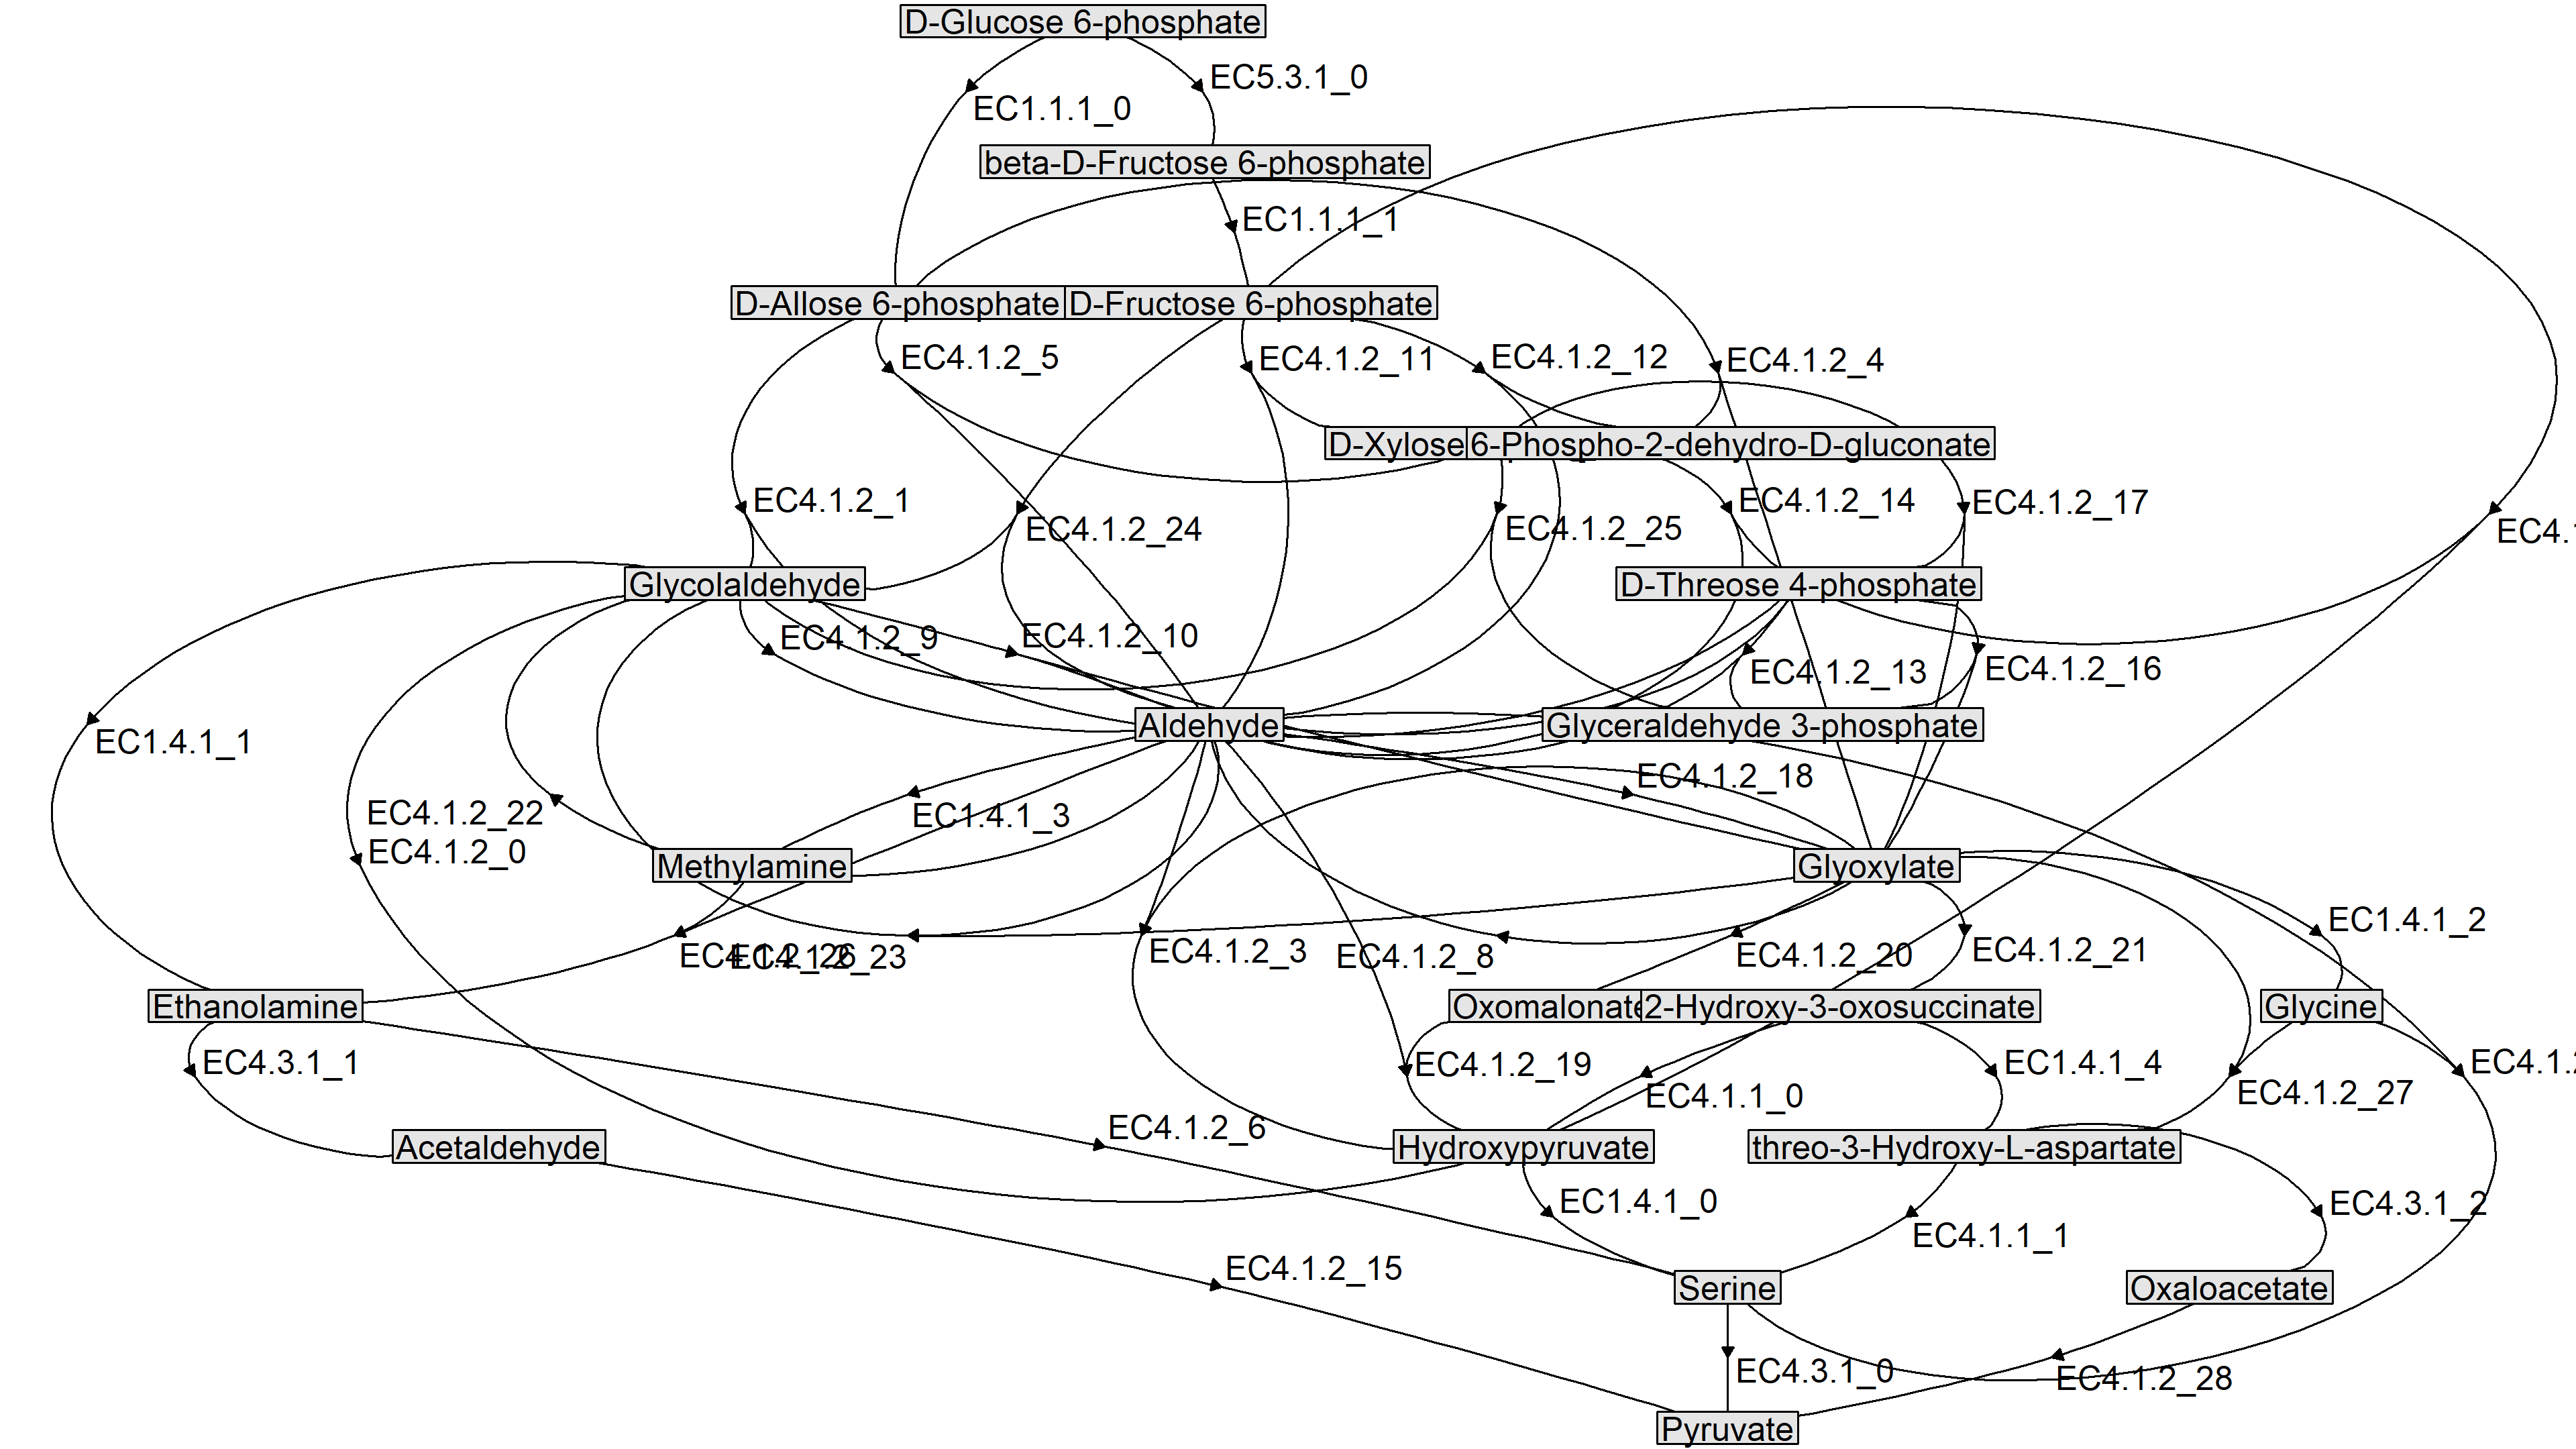

In [4]:
from pathlib import Path
from IPython.display import Image
plot_result_path = Path("../results/" + pathway_result + "/pwy_r/pathways/")
Image(plot_result_path / 'pathway0.png') 

## Sample output plotted (G6P => PYR pathways)  

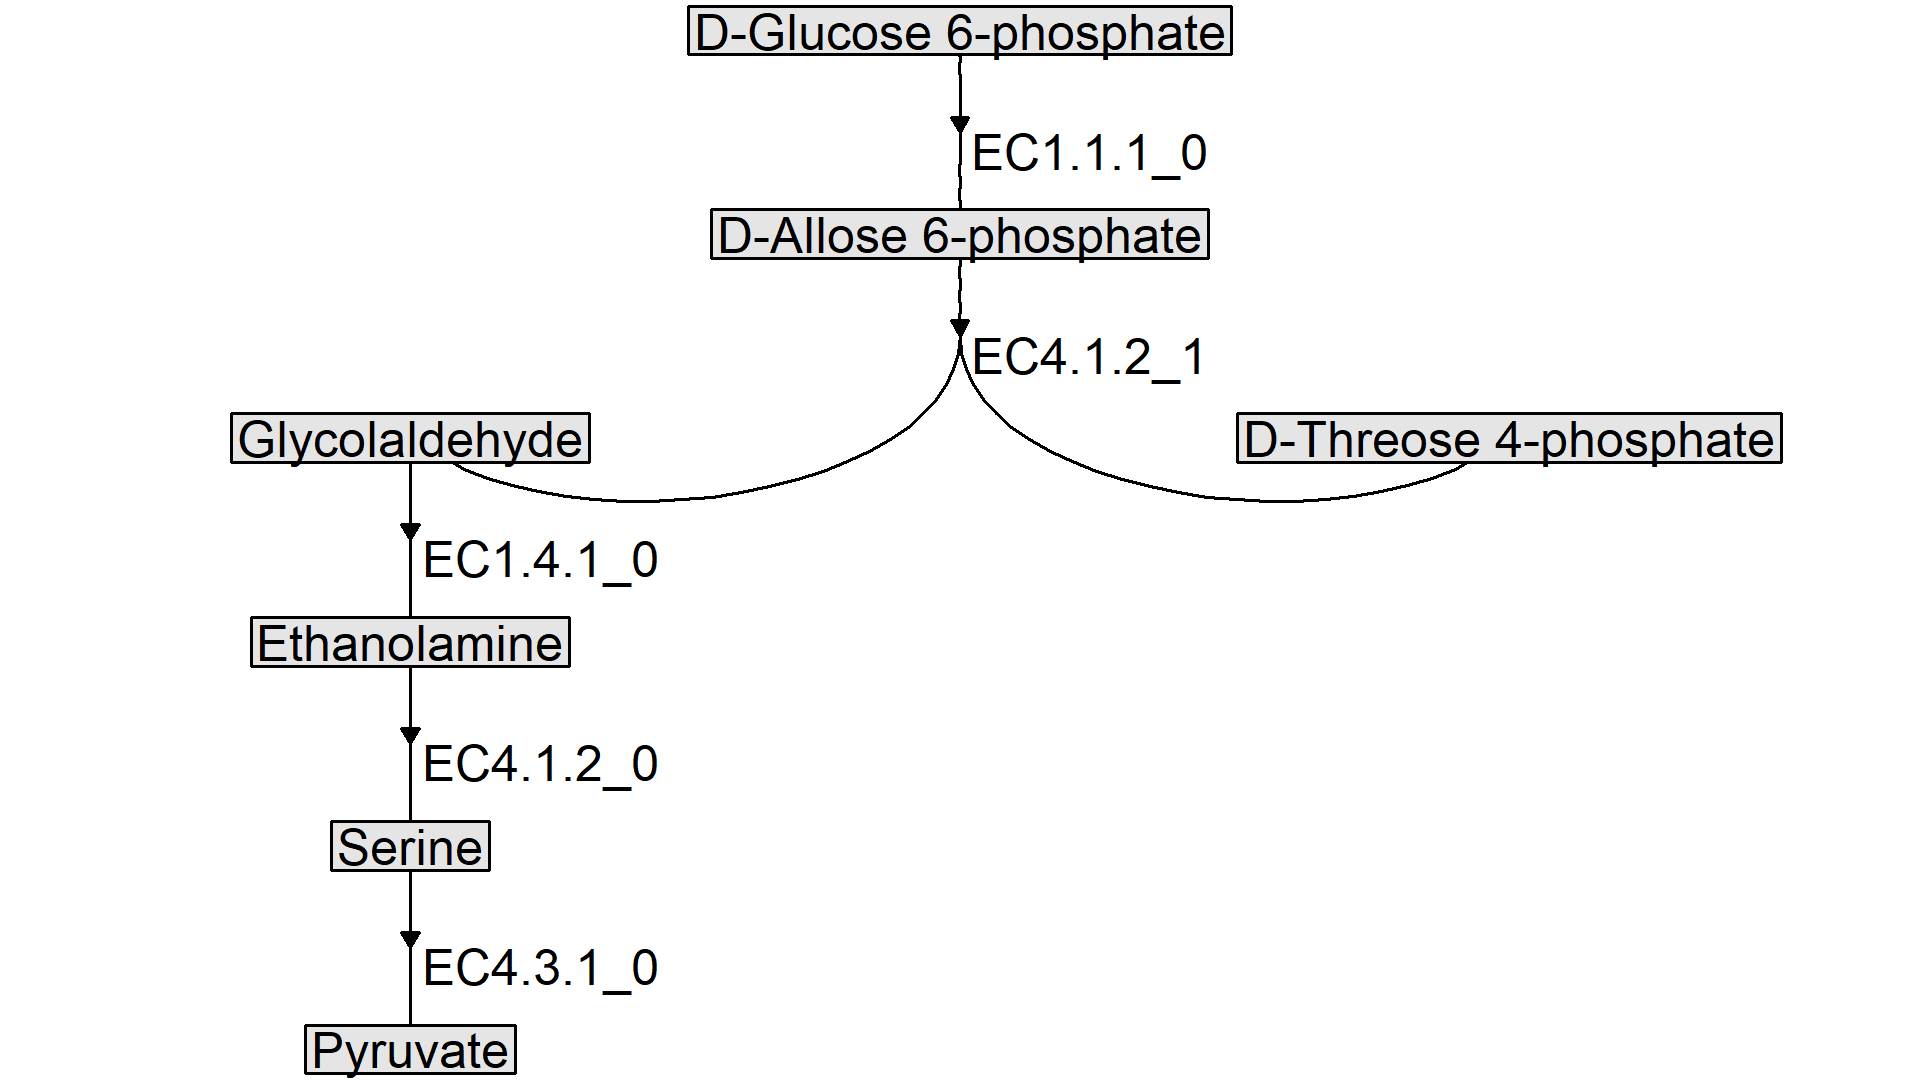

In [5]:
Image(plot_result_path / 'pathway4.png')

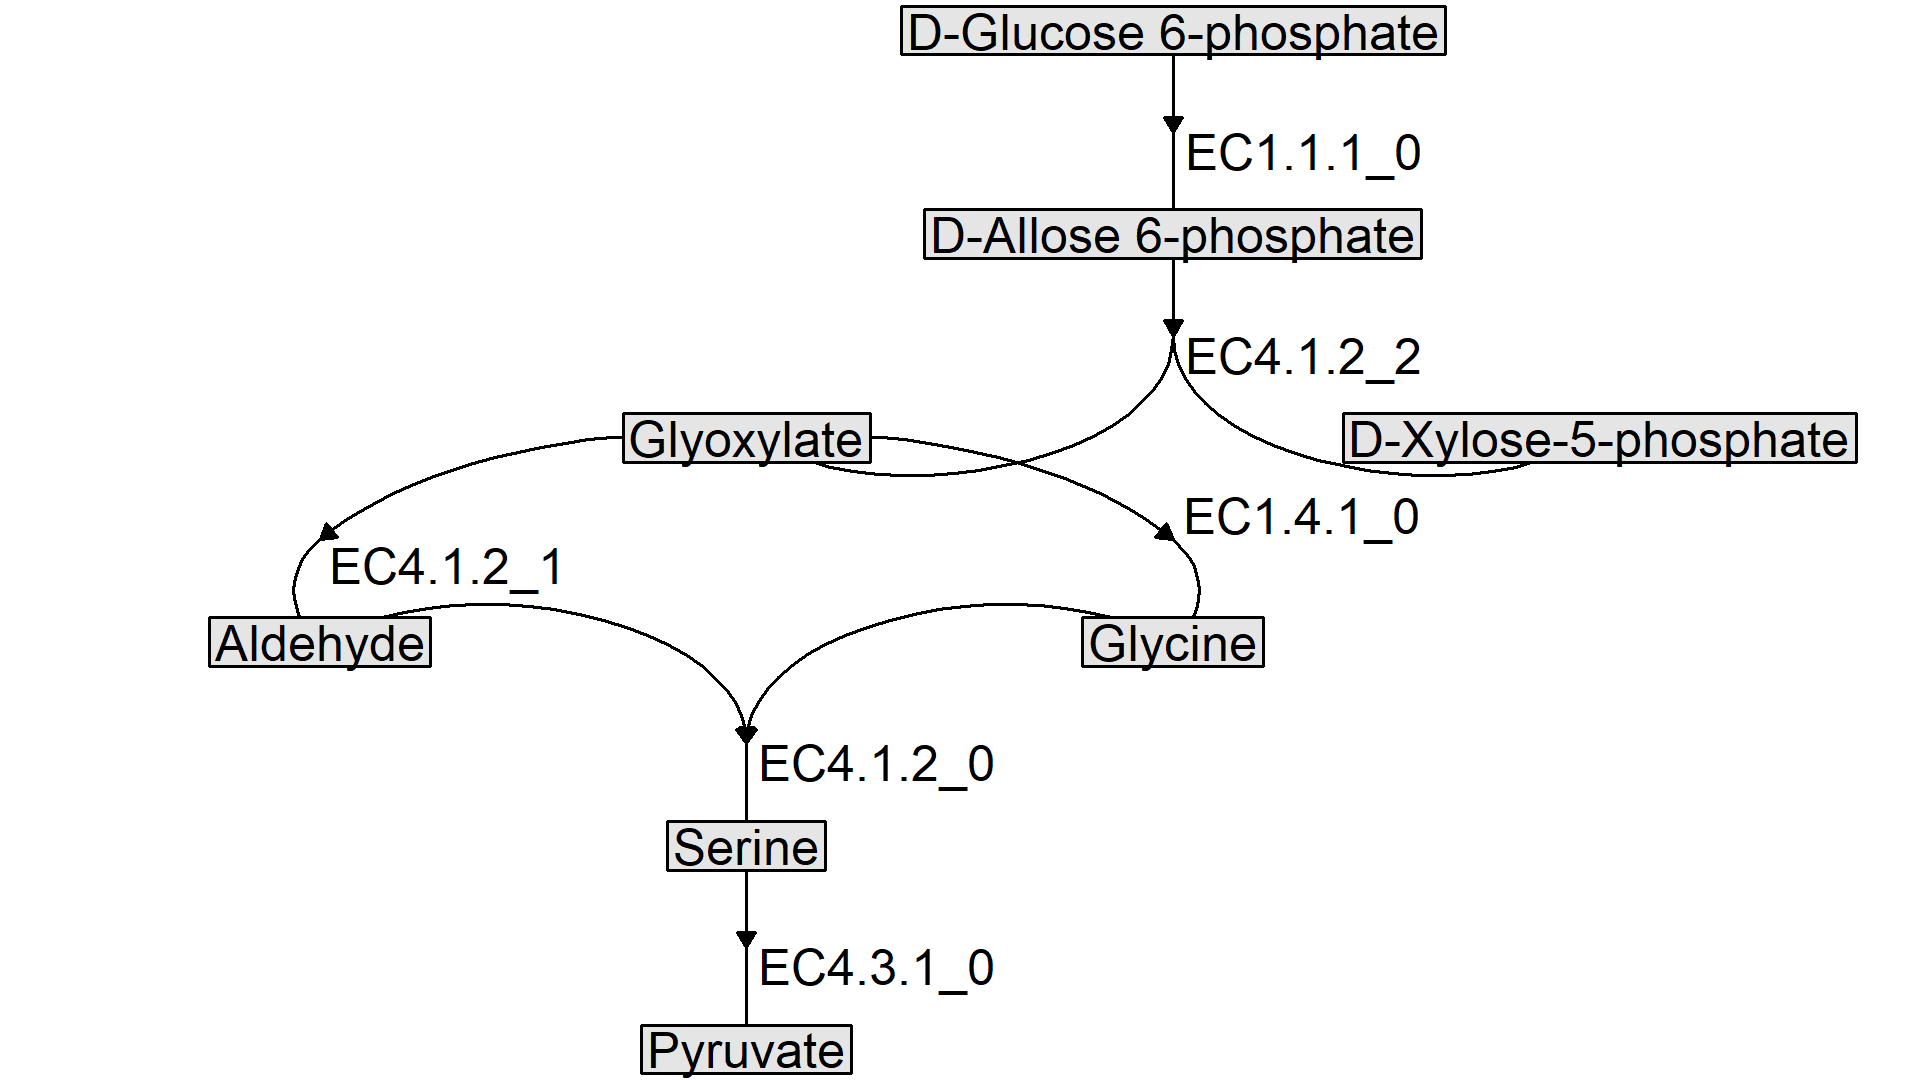

In [6]:
Image(plot_result_path / 'pathway5.png')

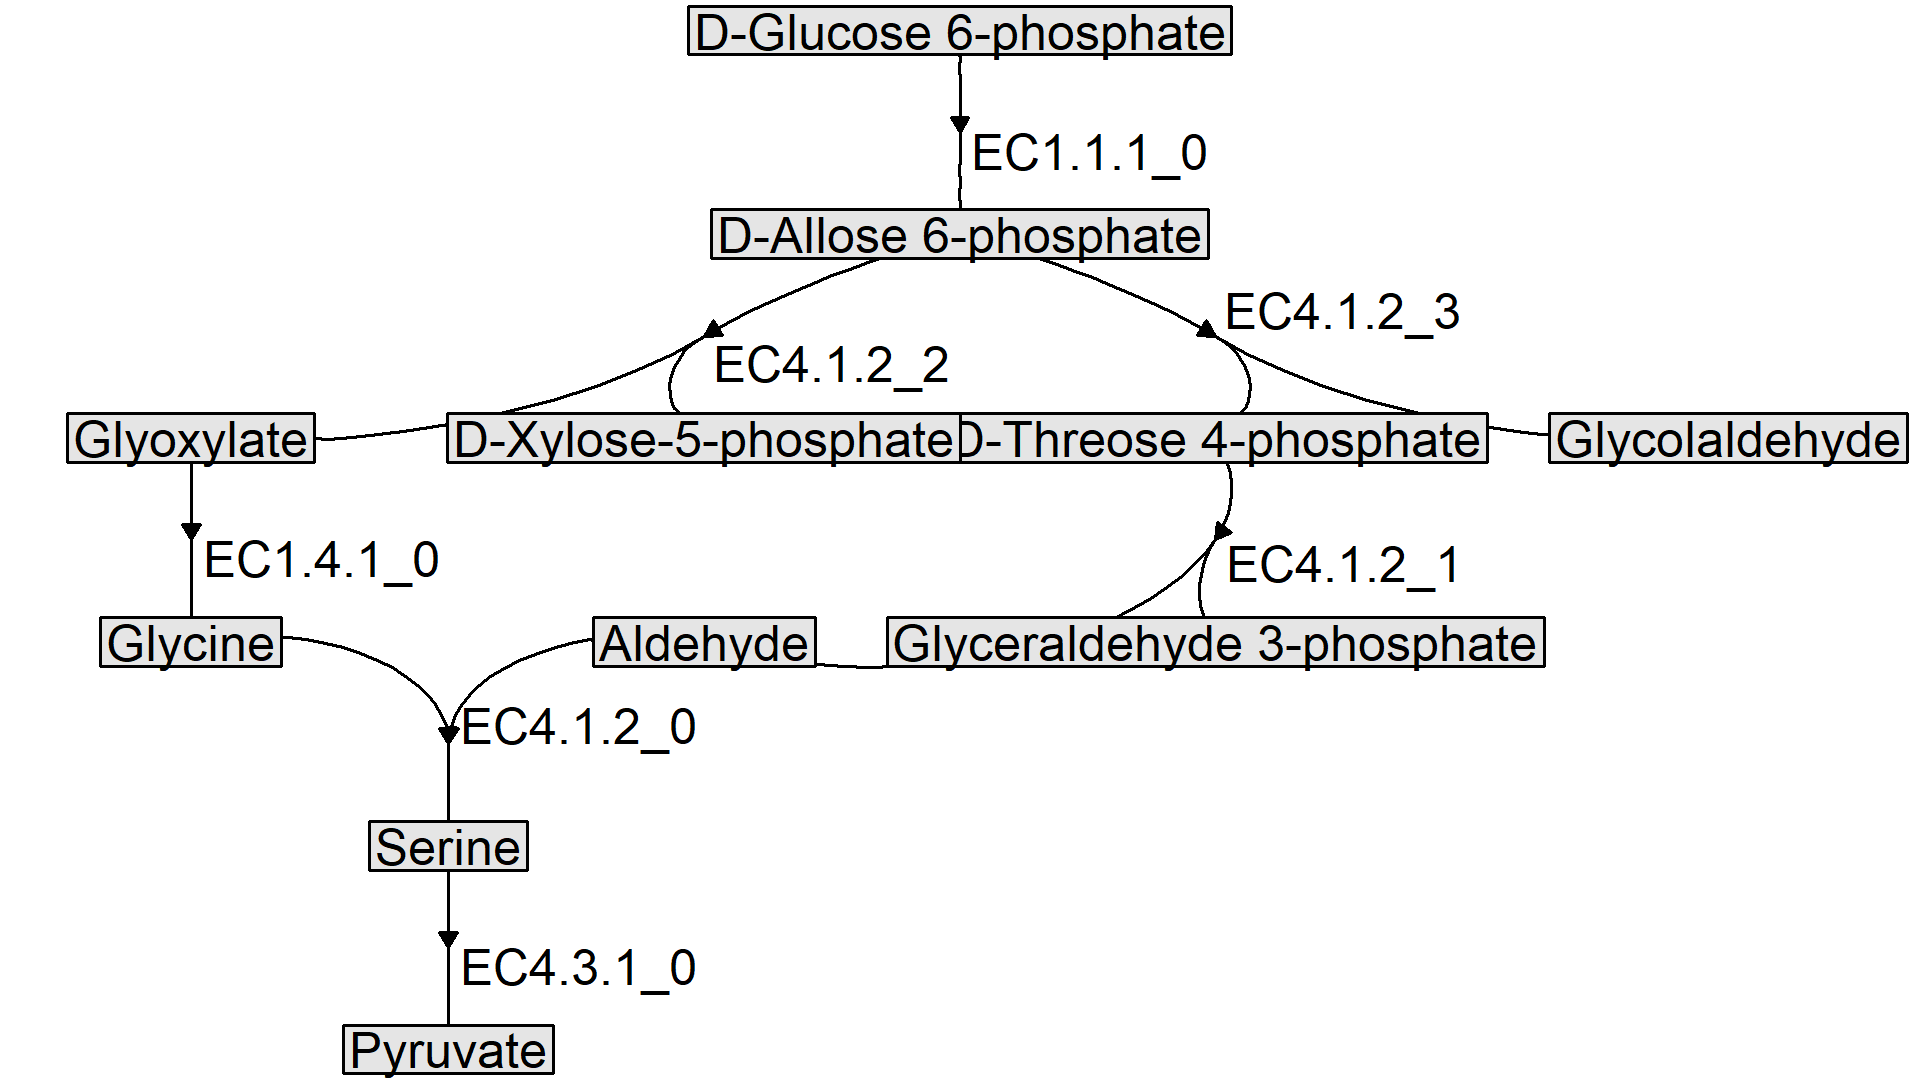

In [7]:
Image(plot_result_path / 'pathway11.png')

## Simple novel pathway prediction task (Ethanol + Butanol => Hexanol)
Novel intermediate compounds are NOT shown for this example because the hypergraphic network contains too many nodes here.

In [8]:
pathway_result_2 = \
main_AP(    rxn_db          =  "APrules",
            pathway_name    =  "EtOHBtOH to HxOH",
            substrates      =  ["CCO.CCCCO"],
            products        =  ["CCCCCCO"],
            max_levels      =  6,
            pruning_method  =  [2,2,2],
            fp_type         =  "ECFP",
            max_value       =  [3,3,3,3],
            bin_adj         =  [0,0,0],
            plot_type       =  "novel"
            )


$$$$$$$$$$$$$$$$$$$$$$$$$$$$  Computing pathway EtOHBtOH to HxOH  $$$$$$$$$$$$$$$$$$$$$$$$$$$$
Step 1: pathway searching

max_O_num 4
max_C_num 9
Substrate:
CCO
CCCCO
Products:
CCCCCCO

>>>>>>>>>>>>>>>>>>>>>>>>> Level #1, searching on the subs side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:01<00:00, 371.96it/s]


Reaction Simulation Finished. Number of new reactions: 7. Number of new compounds: 7.
Compounds currently accepted:  9

>>>>>>>>>>>>>>>>>>>>>>>>> Level #2, searching on the prod side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|██████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 1953.25it/s]


Reaction Simulation Finished. Number of new reactions: 7. Number of new compounds: 7.

>>>>>>>>>>>>>>>>>>>>>>>>> Level #3, searching on the subs side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:01<00:00, 288.71it/s]


Reaction Simulation Finished. Number of new reactions: 47. Number of new compounds: 31.
Accepted All: 31
Compounds currently accepted:  36

>>>>>>>>>>>>>>>>>>>>>>>>> Level #4, searching on the prod side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 564.26it/s]


Reaction Simulation Finished. Number of new reactions: 86. Number of new compounds: 40.
Accepted All: 40
Start backward substitution, number of compounds to be expanded:  7


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 3501.92it/s]



>>>>>>>>>>>>>>>>>>>>>>>>> Level #5, searching on the subs side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|███████████████████████████████████████████████████████████████████████████████| 392/392 [00:03<00:00, 110.49it/s]


Reaction Simulation Finished. Number of new reactions: 1120. last level, skip compound selection
Compounds currently accepted:  986

>>>>>>>>>>>>>>>>>>>>>>>>> Level #6, searching on the prod side <<<<<<<<<<<<<<<<<<<<<<<<<
Reaction Simulation ... 


100%|████████████████████████████████████████████████████████████████████████████████| 392/392 [00:04<00:00, 92.71it/s]


Reaction Simulation Finished. Number of new reactions: 664. last level, skip compound selection
Start backward substitution, number of compounds to be expanded:  54


100%|█████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 635.15it/s]


Time Elapsed 11.284992218017578

Step 1 completed

****************************************************************************************************
Step 2: pathway construction

Any pwys already found through fwd search alone: 
[]
Any pwys already found through bwd search alone: 
[]
Now construct all complete pathways through bridge compounds ...
subs_level:  0 prod_level:  0


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


subs_level:  1 prod_level:  0


0it [00:00, ?it/s]


subs_level:  2 prod_level:  0


0it [00:00, ?it/s]


subs_level:  0 prod_level:  1


100%|███████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 92050.56it/s]


subs_level:  1 prod_level:  1


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


subs_level:  2 prod_level:  1


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


subs_level:  0 prod_level:  2


100%|████████████████████████████████████████████████████████████████████████████| 823/823 [00:00<00:00, 205715.86it/s]


subs_level:  1 prod_level:  2


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


subs_level:  2 prod_level:  2


100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 16001.16it/s]


Final pathways constructed by double direction search: 
Time Elapsed 0.06201481819152832

Step 2 completed
****************************************************************************************************

Step 3: network construction

Skipped for examples.
Time Elapsed 0.0040018558502197266

Step 3 completed

****************************************************************************************************
Step 5: pathway visulization

Time Elapsed 101.78055953979492

Step 5 completed
****************************************************************************************************

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Success !!!
16 pathways found
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Done solving pathway!


## Visualization of Some Novel pathways (Ethanol + Butanol => Hexanol)

Novel intermediate compounds are shown for this example.

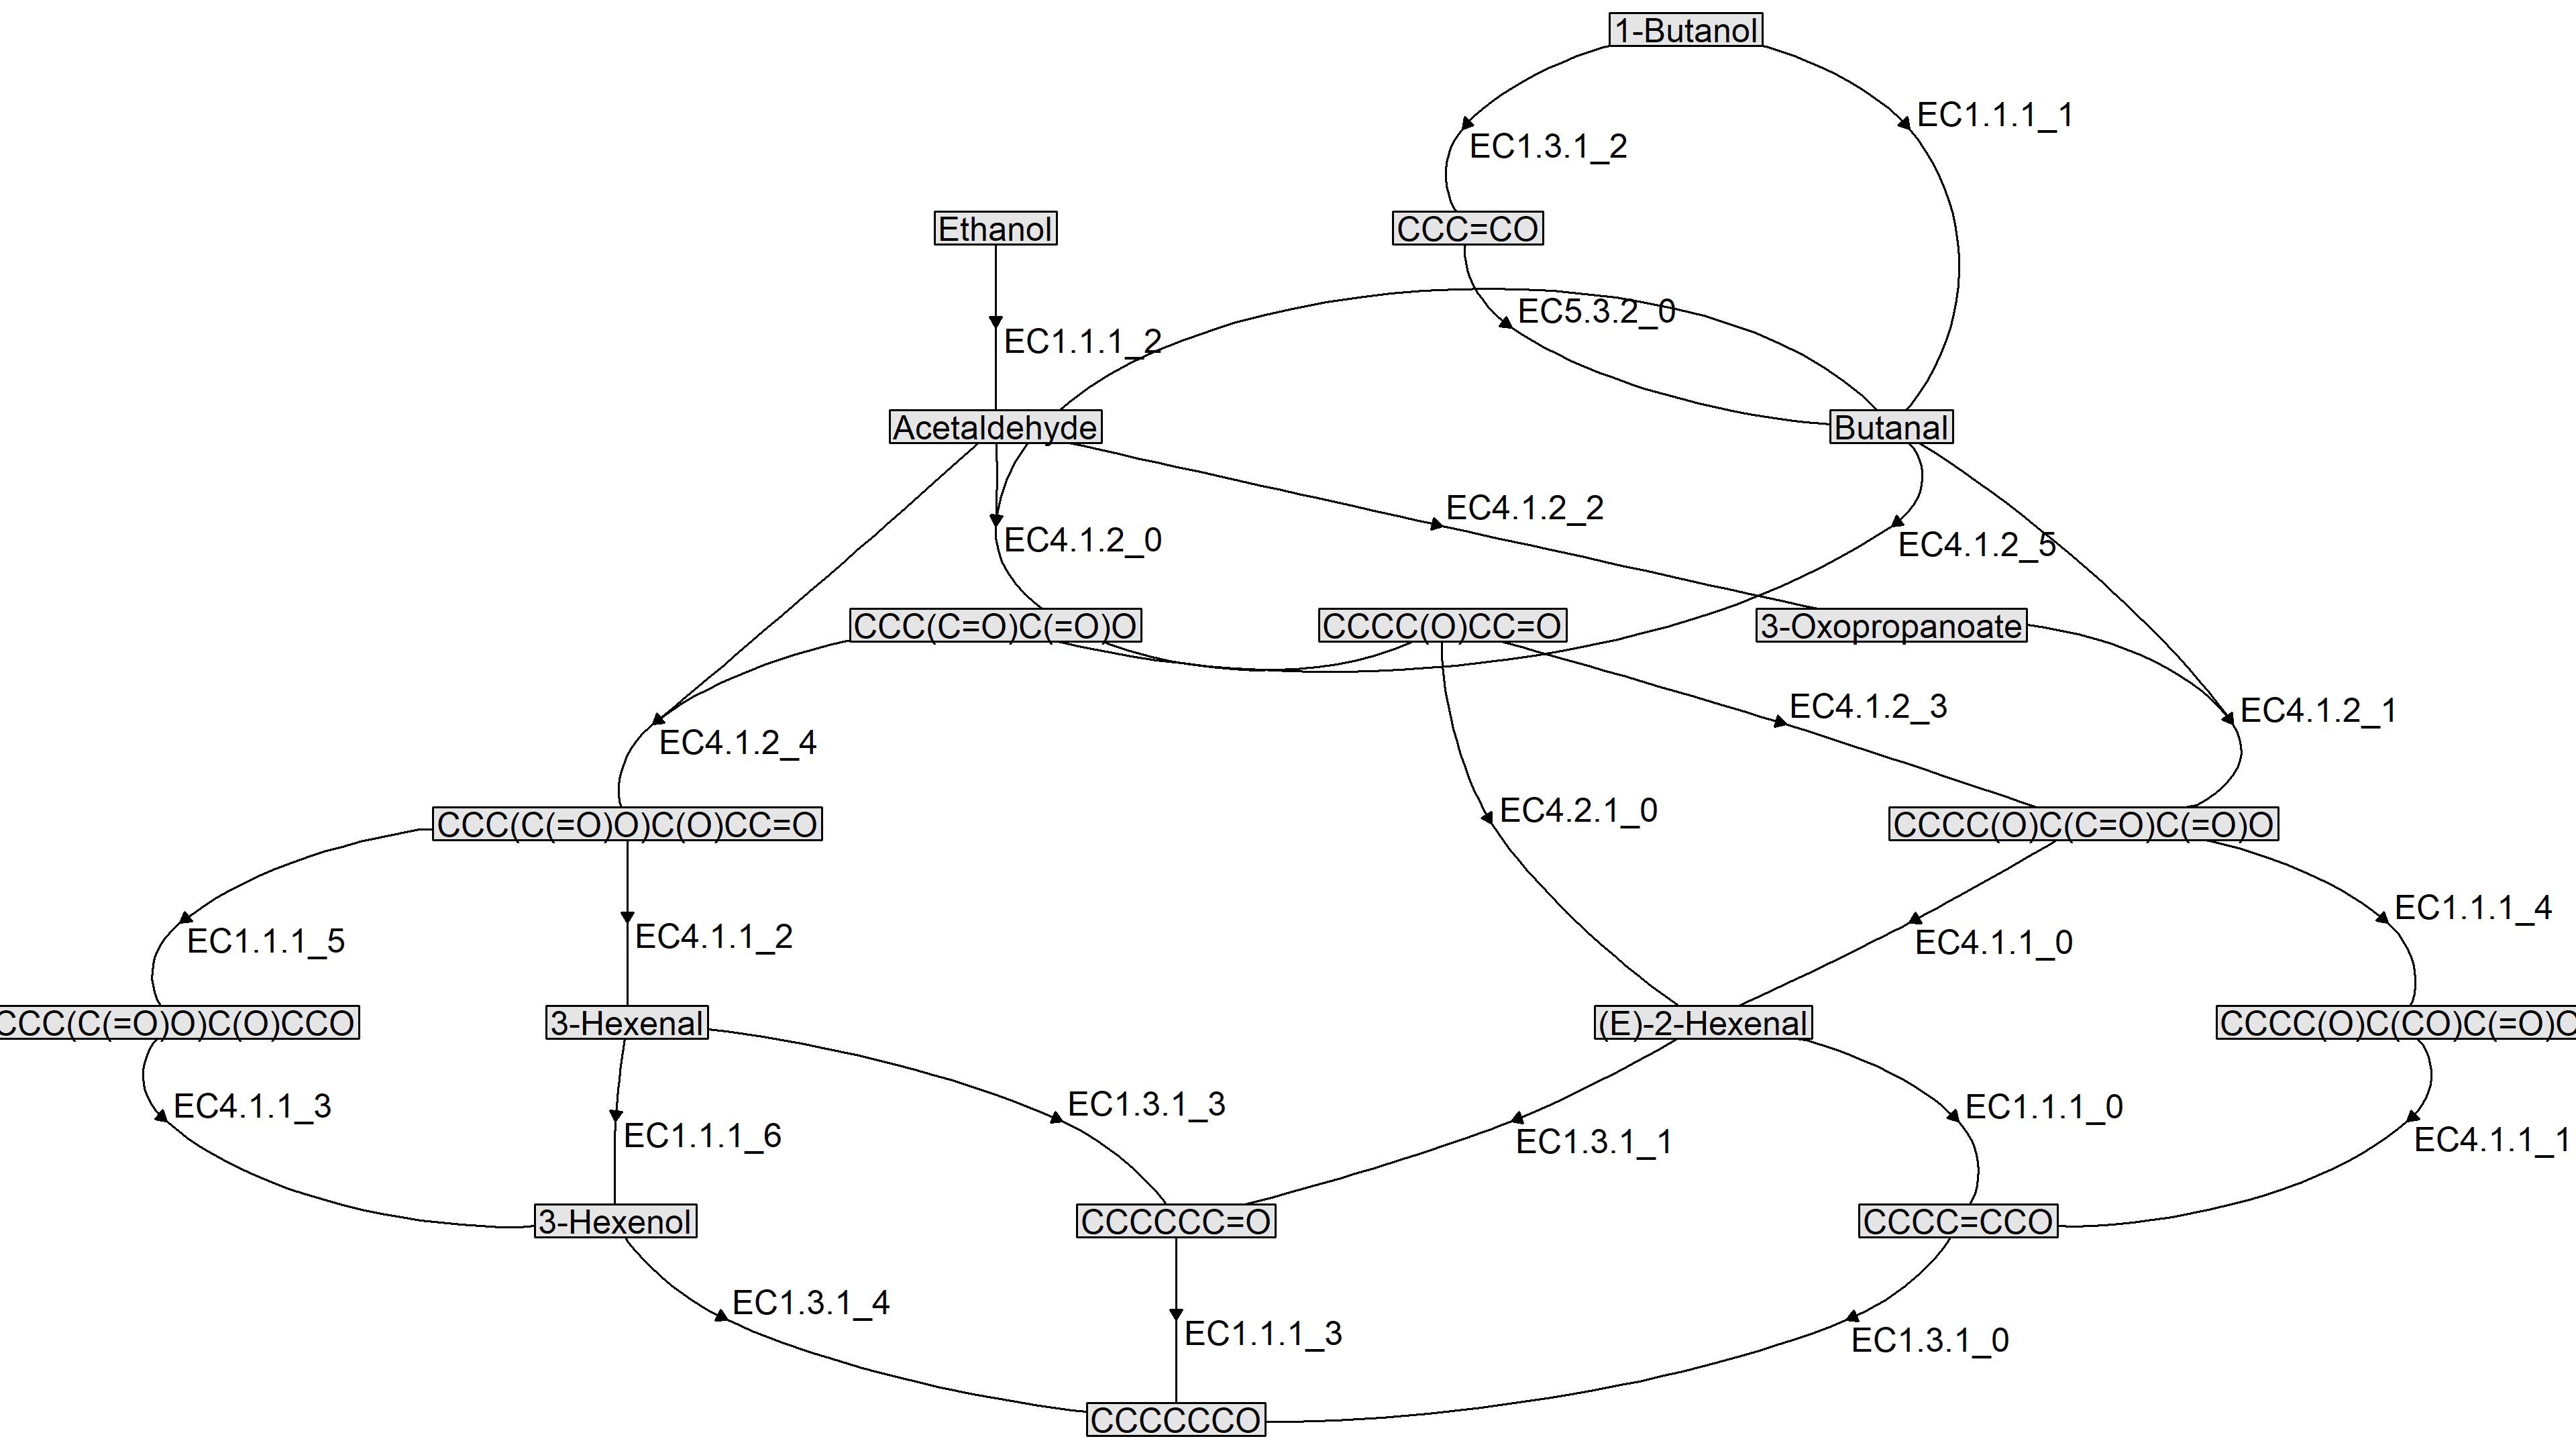

In [9]:
plot_result_path_2 = Path("../results/" + pathway_result_2 + "/pwy_r/pathways/")
Image(plot_result_path_2 / 'pathway0.png') 

## Sample output plotted (Ethanol + Butanol => Hexanol)  

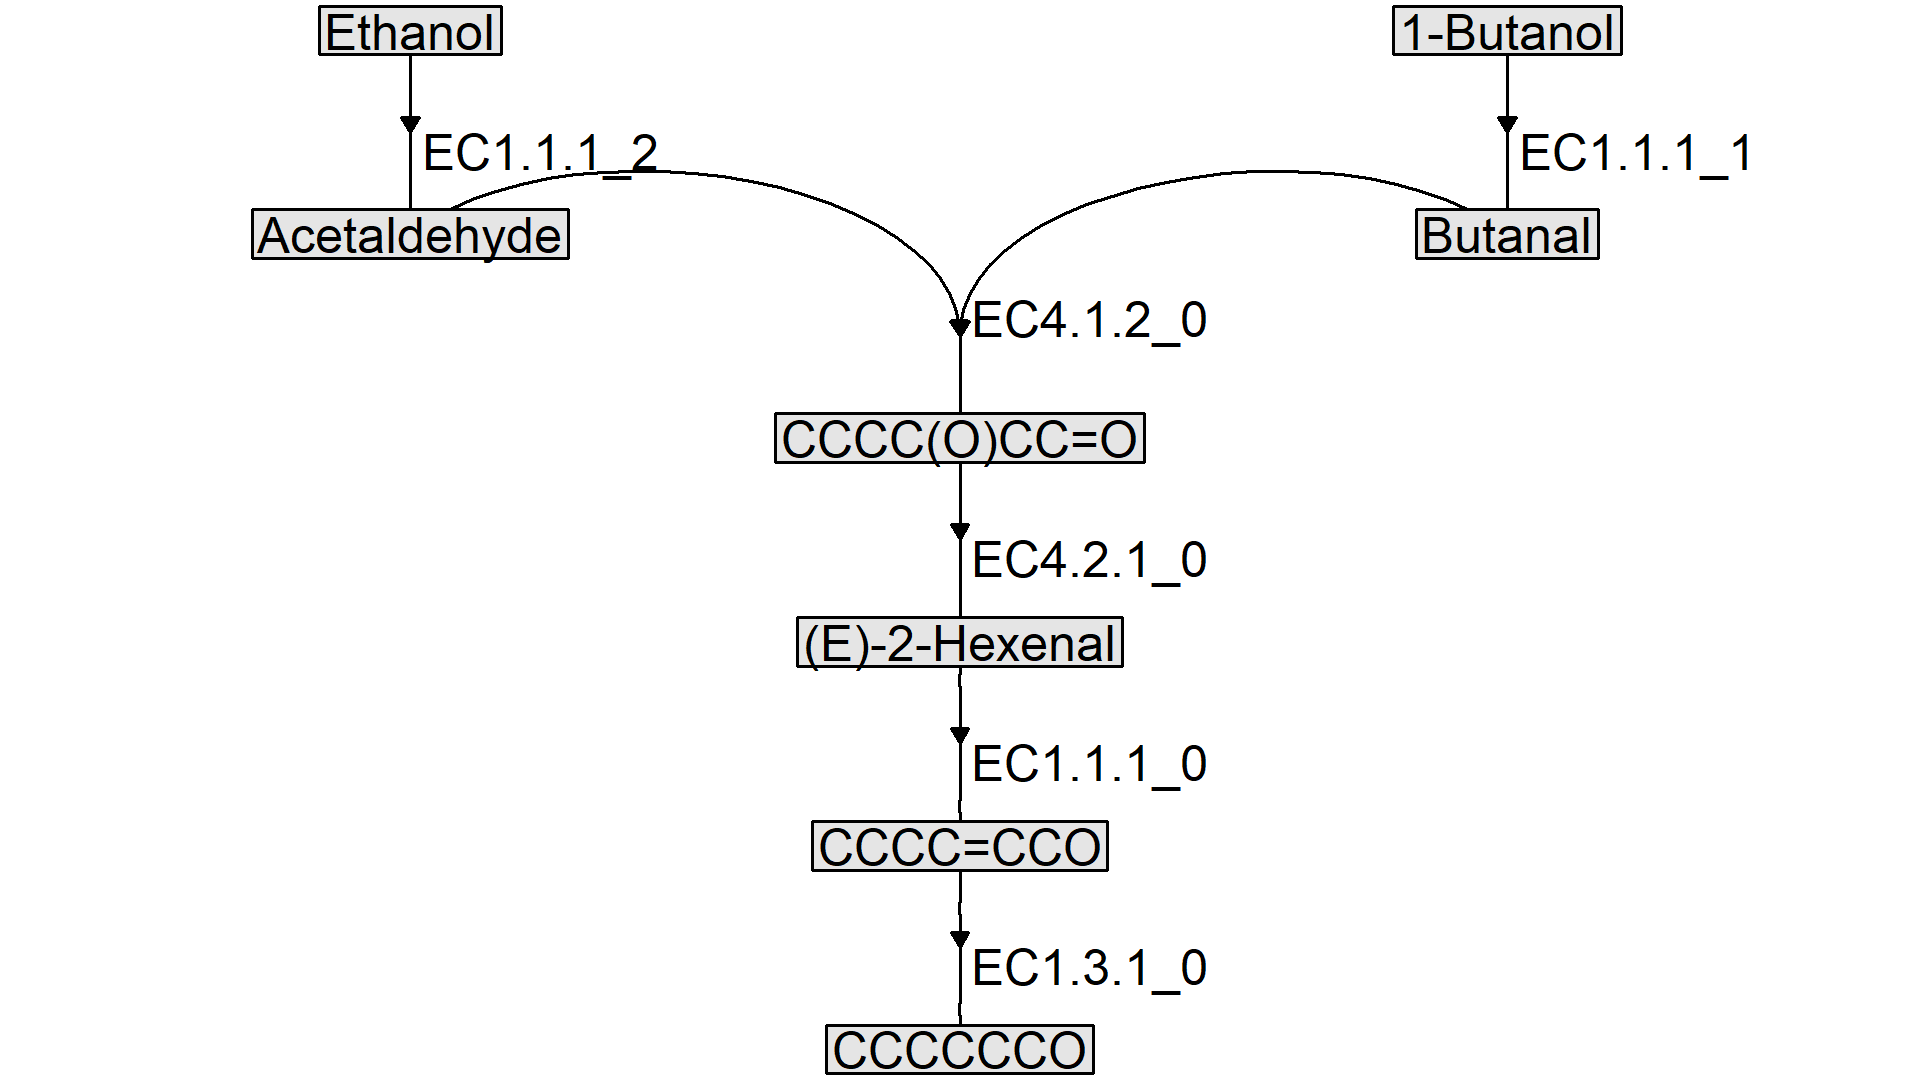

In [10]:
Image(plot_result_path_2 / 'pathway1.png')

## Other Examples User can try on their own.
"CoA" abbreviation can be used for simpler representation for Coenzyme A. The program would recoganize both "CoA" and full SMILES string representation for Coenzyme A, (SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O).

In [11]:
#main_AP(    rxn_db         =  "APrules",
#            pathway_name   =  'Glucose to AcCoA',
#            substrates     =  ['C(C1C(C(C(C(O1)O)O)O)O)OP(=O)(O)O'],
#            products       =  ['CC(=O)CoA'],
#            max_levels     =  6,
#            pruning_method =  [0,0,0],
#            fp_type        =  "ECFP",
#            max_value      =  [0,0,0,0],
#            bin_adj        =  [0.2,0.2,0.2],
#            plot_type      =  "selected",
#            )

In [12]:
#main_AP(    rxn_db         =  "APrules",
#            pathway_name   =  'AKG to LYS ',
#            substrates     =  ['O=C(O)C(=O)CCC(=O)O'],
#            products       =  ['NCCCCC(N)C(=O)O'],
#            max_levels     =  8,
#            pruning_method =  [2,2,2],
#            fp_type        =  "ECFP",
#            max_value      =  [2,2,2,2],
#            bin_adj        =  [0.1,0.1,0.1],
#            plot_type      =  "selected",
#            )

In [13]:
###################################################################################################################
###################################################################################################################
# Amino Acids
    # ARG                                  C(C(C(=O)O)N)C(=O)N
    # HIS                                  C1=C(NC=N1)CC(C(=O)O)N
    # LYS                                  C(CCN)CC(C(=O)O)N
    # ASP                                  O=C(O)CC(N)C(=O)O
    # GLU                                  C(CC(=O)O)C(C(=O)O)N
    # SER                                  C(C(C(=O)O)N)O
    # THR                                  CC(C(C(=O)O)N)O
    # ASN                                  C(C(C(=O)O)N)C(=O)N
    # GLN                                  C(CC(=O)N)C(C(=O)O)N
    # PRO                                  C1CC(NC1)C(=O)O
    # alanine                              CC(C(=O)O)N
    # valine                               CC(C)C(C(=O)O)N
    # isoleucine                           CCC(C)C(C(=O)O)N
    # leucine                              CC(C)CC(C(=O)O)N
    # glutamate                            C(CC(=O)O)C(C(=O)O)N
    # glutamine                            C(CC(=O)N)C(C(=O)O)N
    # proline                              C1CC(NC1)C(=O)O
    # arginine                             C(CC(C(=O)O)N)CN=C(N)N
    # oxaloacetate                         O=C(O)C(=O)CC(=O)O
    # aspartate                            O=C(O)CC(N)C(=O)O
    # asparagine                           O=C(N)CC(N)C(=O)O
    # threonine                            CC(C(C(=O)O)N)O
    # lysine                               C(CCN)CC(C(=O)O)N
    # glutamate                            C(CC(=O)O)C(C(=O)O)N
    # aspartate                            O=C(O)CC(N)C(=O)O
    # histidine                            C1=C(NC=N1)CC(C(=O)O)N
    # serine                               C(C(C(=O)O)N)O
    # glycine                              C(C(=O)O)N
    # methionine                           CSCCC(C(=O)O)N
    # cysteine                             C(C(C(=O)O)N)S
    # phenylalanine                        C1=CC=C(C=C1)CC(C(=O)O)N
    # Tyrosine                             C1=CC(=CC=C1CC(C(=O)O)N)O
    # Tryptophan                           C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N
###################################################################################################################
###################################################################################################################
# Common Central Carbon Metabolites
    # oxaloacetate (oxaloacetic acid)      O=C(O)C(=O)CC(=O)O
    # pyruvate                             O=C(C(=O)O)C
    # alpha-ketoglutarate                  O=C(O)C(=O)CCC(=O)O
    # G6P                                  C(C1C(C(C(C(O1)O)O)O)O)OP(=O)(O)O
    # PEP                                  O=C(O)C(OP(=O)(O)O)=C
    # E4P                                  C(C(C(C=O)O)O)OP(=O)(O)O
    # R5P                                  C(C(C(C(C=O)O)O)O)OP(=O)(O)O
    # F6P                                  C(C(C(C(C(=O)CO)O)O)O)OP(=O)(O)O
    # DAHP                                 C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O
    # PYU                                  O=C(C(=O)O)C                            pyruvate
    # OXA                                  O=C(O)C(=O)CC(=O)O                      oxaloacetate
    # SUC                                  C(CC(=O)O)C(=O)O                        succinate
    # AKG                                  O=C(O)C(=O)CCC(=O)O                     alpha-ketoglutarate, 2-OG

In [14]:
def main_test(  rxn_db         =  "APrules",
                pathway_name   =  "test_pathway",
                substrates     =  ["C(C1C(C(C(C(O1)O)O)O)O)OP(=O)(O)O"], # G6P
                products       =  ["O=C(C(=O)O)C"], #PYR
                max_levels     =  6,
                pruning_method =  [0,0,0],
                fp_type        =  "ECFP",
                max_value      =  [0,0,0,0],
                bin_adj        =  [0.0,0.0,0.0],
                plot_type      =  "selected",
                count_trial    =  1
             ):
    for one_trial in range(count_trial):
        main_AP(rxn_db,pathway_name,substrates,products,max_levels,pruning_method,fp_type,max_value,bin_adj,plot_type)